In [1792]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

## Load the Data

In [1793]:
employee_df = pd.read_csv('HR_Employee_Attrition.csv')
employee_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [1794]:
employee_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [1795]:
front = employee_df['Attrition']
employee_df.drop(labels = ['Attrition'], axis = 1,inplace = True)
employee_df.insert(0, 'Attrition', front)
employee_df.head()

,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,Yes,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,No,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,Yes,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,No,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,No,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


## Exploratory Data Analysis

In [1796]:
#check for nulls by percentage 
employee_null = employee_df.isna()
employee_num_missing = employee_null.sum()
employee_num_missing/len(employee_df)

Attrition                   0.0
Age                         0.0
BusinessTravel              0.0
DailyRate                   0.0
Department                  0.0
DistanceFromHome            0.0
Education                   0.0
EducationField              0.0
EmployeeCount               0.0
EmployeeNumber              0.0
EnvironmentSatisfaction     0.0
Gender                      0.0
HourlyRate                  0.0
JobInvolvement              0.0
JobLevel                    0.0
JobRole                     0.0
JobSatisfaction             0.0
MaritalStatus               0.0
MonthlyIncome               0.0
MonthlyRate                 0.0
NumCompaniesWorked          0.0
Over18                      0.0
OverTime                    0.0
PercentSalaryHike           0.0
PerformanceRating           0.0
RelationshipSatisfaction    0.0
StandardHours               0.0
StockOptionLevel            0.0
TotalWorkingYears           0.0
TrainingTimesLastYear       0.0
WorkLifeBalance             0.0
YearsAtC

In [1797]:
#df stats
employee_df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


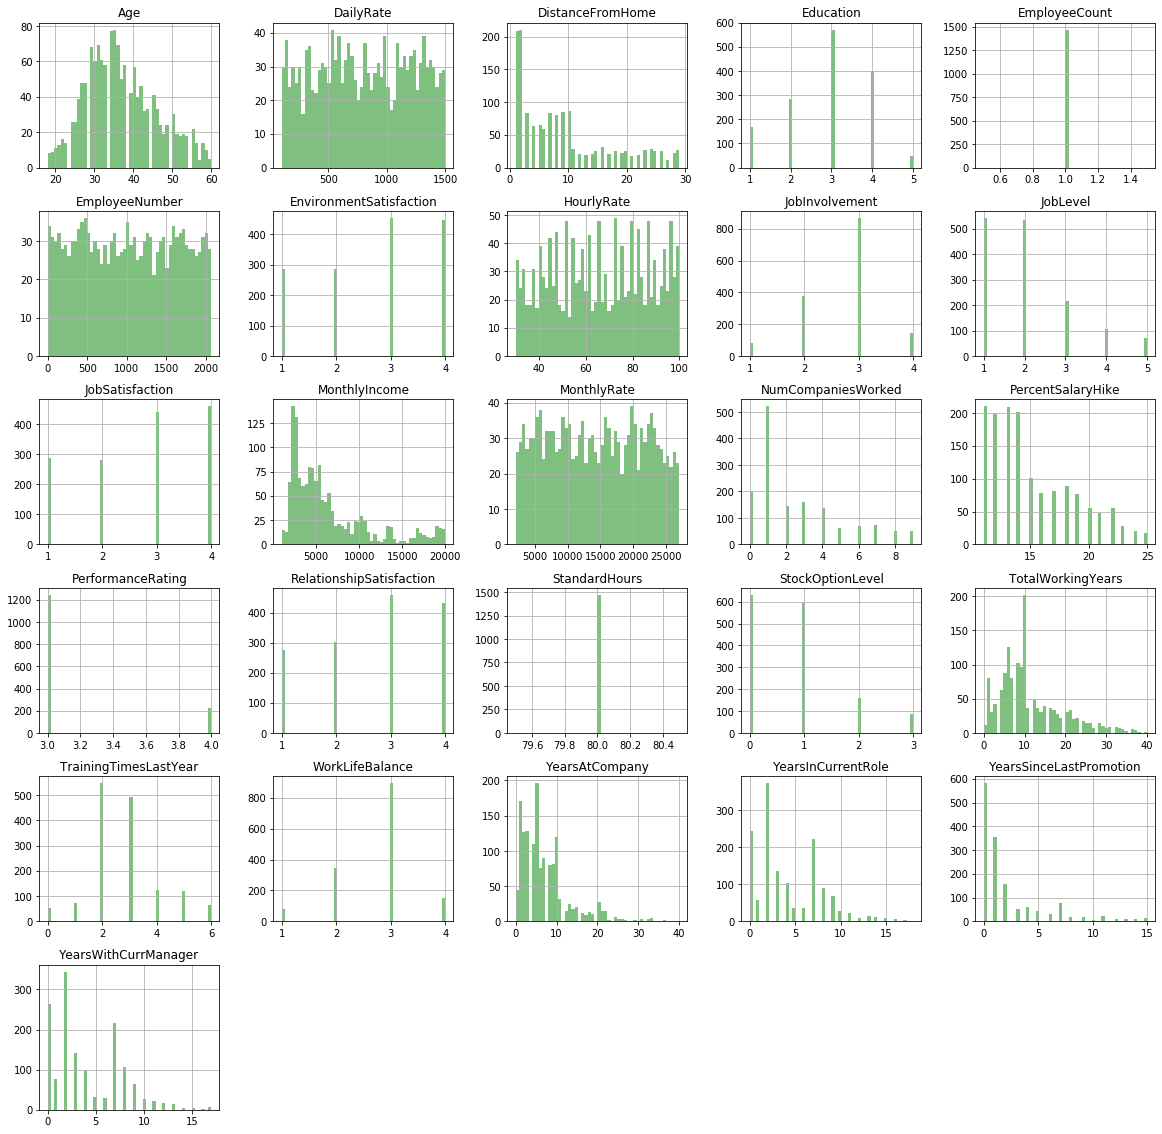

In [1798]:
employee_df.hist(figsize=(20,20), bins=50, color="green", alpha=0.5)
plt.show()

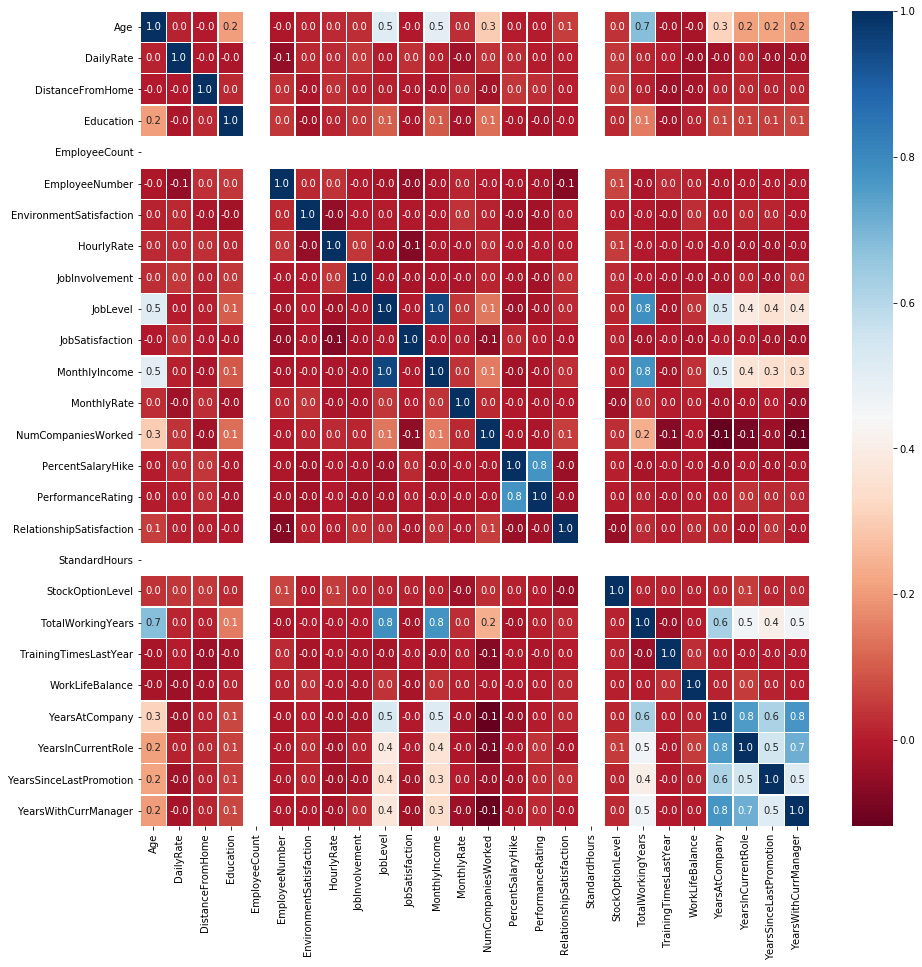

In [1799]:
#correlation map 
f,ax =  plt.subplots(figsize=(15,15))
corr = employee_df.corr()
sns.heatmap(corr, cmap='RdBu',annot=True, linewidth=.4,ax=ax,fmt='.1f',)

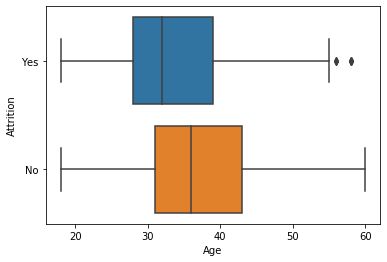

In [1834]:
sns.boxplot(x ='Age', y ='Attrition', data = employee_df)

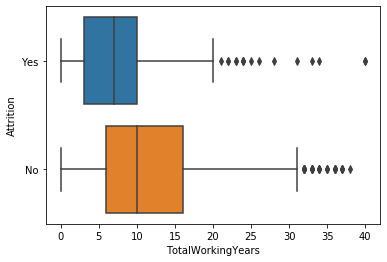

In [1837]:
sns.boxplot(x ='TotalWorkingYears', y ='Attrition', data = employee_df)

## Feature Scaling

In [1800]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [1801]:
label_encoder = LabelEncoder()
employee_df['BusinessTravel'] = label_encoder.fit_transform(employee_df['BusinessTravel'])
employee_df['Department'] = label_encoder.fit_transform(employee_df['Department'])
employee_df['EducationField'] = label_encoder.fit_transform(employee_df['EducationField'])
employee_df['Gender'] = label_encoder.fit_transform(employee_df['Gender'])
employee_df['JobRole'] = label_encoder.fit_transform(employee_df['JobRole'])
employee_df['MaritalStatus'] = label_encoder.fit_transform(employee_df['MaritalStatus'])
employee_df['Over18'] = label_encoder.fit_transform(employee_df['Over18'])
employee_df['OverTime'] = label_encoder.fit_transform(employee_df['OverTime'])

In [1802]:
y = label_encoder.fit_transform(y)
y = employee_df['Attrition']

In [1803]:
X = employee_df.drop(['Attrition'], axis = 1)
X.keys()
X.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,2,1102,2,1,2,1,1,1,2,...,1,80,0,8,0,1,6,4,0,5
1,49,1,279,1,8,1,1,1,2,3,...,4,80,1,10,3,3,10,7,1,7
2,37,2,1373,1,2,2,4,1,4,4,...,2,80,0,7,3,3,0,0,0,0
3,33,1,1392,1,3,4,1,1,5,4,...,3,80,0,8,3,3,8,7,3,0
4,27,2,591,1,2,1,3,1,7,1,...,4,80,1,6,3,3,2,2,2,2


In [1804]:
standard = StandardScaler()
X.iloc[:,[i for i in range(34)]] = standard.fit_transform(X.iloc[:,[i for i in range(34)]])
X.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.446350,0.590048,0.742527,1.401512,-1.010909,-0.891688,-0.937414,0.0,-1.701283,-0.660531,...,-1.584178,0.0,-0.932014,-0.421642,-2.171982,-2.493820,-0.164613,-0.063296,-0.679146,0.245834
1,1.322365,-0.913194,-1.297775,-0.493817,-0.147150,-1.868426,-0.937414,0.0,-1.699621,0.254625,...,1.191438,0.0,0.241988,-0.164511,0.155707,0.338096,0.488508,0.764998,-0.368715,0.806541
2,0.008343,0.590048,1.414363,-0.493817,-0.887515,-0.891688,1.316673,0.0,-1.696298,1.169781,...,-0.658973,0.0,-0.932014,-0.550208,0.155707,0.338096,-1.144294,-1.167687,-0.679146,-1.155935
3,-0.429664,-0.913194,1.461466,-0.493817,-0.764121,1.061787,-0.937414,0.0,-1.694636,1.169781,...,0.266233,0.0,-0.932014,-0.421642,0.155707,0.338096,0.161947,0.764998,0.252146,-1.155935
4,-1.086676,0.590048,-0.524295,-0.493817,-0.887515,-1.868426,0.565311,0.0,-1.691313,-1.575686,...,1.191438,0.0,0.241988,-0.678774,0.155707,0.338096,-0.817734,-0.615492,-0.058285,-0.595227


In [1805]:
y = label_encoder .fit_transform(y)
y = employee_df['Attrition']

In [1806]:
selected_X = employee_df.drop(['EmployeeCount','StandardHours', 'BusinessTravel',
                                'Department','PerformanceRating','Education',
                              'Over18','Gender', 'RelationshipSatisfaction',], axis=1, inplace=True)

In [1807]:
selected_X = employee_df.drop(['Attrition'], axis = 1)
selected_X.keys()
selected_X.head()

,Age,DailyRate,DistanceFromHome,EducationField,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobRole,...,OverTime,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,1,1,2,94,3,2,7,...,1,11,0,8,0,1,6,4,0,5
1,49,279,8,1,2,3,61,2,2,6,...,0,23,1,10,3,3,10,7,1,7
2,37,1373,2,4,4,4,92,2,1,2,...,1,15,0,7,3,3,0,0,0,0
3,33,1392,3,1,5,4,56,3,1,6,...,1,11,0,8,3,3,8,7,3,0
4,27,591,2,3,7,1,40,3,1,2,...,0,12,1,6,3,3,2,2,2,2


In [1808]:
standard = StandardScaler()
selected_X.iloc[:,[i for i in range(25)]] = standard.fit_transform(selected_X.iloc[:,[i for i in range(25)]])
selected_X.head()

,Age,DailyRate,DistanceFromHome,EducationField,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobRole,...,OverTime,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.446350,0.742527,-1.010909,-0.937414,-1.701283,-0.660531,1.383138,0.379672,-0.057788,1.032716,...,1.591746,-1.150554,-0.932014,-0.421642,-2.171982,-2.493820,-0.164613,-0.063296,-0.679146,0.245834
1,1.322365,-1.297775,-0.147150,-0.937414,-1.699621,0.254625,-0.240677,-1.026167,-0.057788,0.626374,...,-0.628241,2.129306,0.241988,-0.164511,0.155707,0.338096,0.488508,0.764998,-0.368715,0.806541
2,0.008343,1.414363,-0.887515,1.316673,-1.696298,1.169781,1.284725,-1.026167,-0.961486,-0.998992,...,1.591746,-0.057267,-0.932014,-0.550208,0.155707,0.338096,-1.144294,-1.167687,-0.679146,-1.155935
3,-0.429664,1.461466,-0.764121,-0.937414,-1.694636,1.169781,-0.486709,0.379672,-0.961486,0.626374,...,1.591746,-1.150554,-0.932014,-0.421642,0.155707,0.338096,0.161947,0.764998,0.252146,-1.155935
4,-1.086676,-0.524295,-0.887515,0.565311,-1.691313,-1.575686,-1.274014,0.379672,-0.961486,-0.998992,...,-0.628241,-0.877232,0.241988,-0.678774,0.155707,0.338096,-0.817734,-0.615492,-0.058285,-0.595227


## Model Training

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, make_scorer,average_precision_score
from sklearn.metrics import roc_curve

In [1810]:
#data split with all features
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(X,y, test_size = 0.3, random_state = 12,stratify = y)

In [1811]:
print(X_train_all.shape, X_test_all.shape, y_train_all.shape, y_test_all.shape)

(1029, 34) (441, 34) (1029,) (441,)


In [1812]:
#data split with selected features
X_train, X_test, y_train, y_test = train_test_split(selected_X,y, test_size = 0.3, random_state = 12, stratify = y)

In [1813]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1029, 25) (441, 25) (1029,) (441,)


### Decision Tree w/ All Features

In [1814]:
dt_classifier_all = DecisionTreeClassifier(random_state = 0,
                                    criterion = 'entropy',  splitter='best', min_samples_leaf=1, min_samples_split=2)
dt_classifier_all.fit(X_train_all, y_train_all)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [1815]:
y_pred_all = dt_classifier_all.predict(X_test_all)

confuse_matrix_all = pd.DataFrame(confusion_matrix(y_test_all, y_pred_all),
                             index = ['True[0]', 'True[1]'],
                             columns = ['Predict[0]', 'Predict[1]'])

confuse_matrix_all

,Predict[0],Predict[1]
True[0],311,59
True[1],49,22


In [1816]:
print(classification_report(y_test_all, y_pred_all))

              precision    recall  f1-score   support

          No       0.86      0.84      0.85       370
         Yes       0.27      0.31      0.29        71

    accuracy                           0.76       441
   macro avg       0.57      0.58      0.57       441
weighted avg       0.77      0.76      0.76       441



In [1817]:
print('accuracy: %.3f' % accuracy_score(y_test_all, y_pred_all))

accuracy: 0.755


### Decision Tree w/ Selected Features

In [1818]:
dt_classifier = DecisionTreeClassifier(random_state = 0,
                                    criterion = 'entropy',  splitter='best', min_samples_leaf=1, min_samples_split=2)
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [1819]:
y_pred = dt_classifier.predict(X_test)

confuse_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred),
                             index = ['True[0]', 'True[1]'],
                             columns = ['Predict[0]', 'Predict[1]'])

confuse_matrix

,Predict[0],Predict[1]
True[0],322,48
True[1],44,27


In [1820]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.88      0.87      0.88       370
         Yes       0.36      0.38      0.37        71

    accuracy                           0.79       441
   macro avg       0.62      0.63      0.62       441
weighted avg       0.80      0.79      0.79       441



In [1821]:
print('accuracy: %.3f' % accuracy_score(y_test, y_pred))

accuracy: 0.791


### Logistic Regression w/ All Features

In [1822]:
logistic_model_all = LogisticRegression(solver = 'liblinear', penalty = 'l2', C = 0.001, random_state = 1)
logistic_model_all.fit(X_train_all, y_train_all)

LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [1823]:
y_pred_lr_all = logistic_model_all.predict(X_test_all)

confuse_matrix_lr_all = pd.DataFrame(confusion_matrix(y_test_all, y_pred_lr_all),
                             index = ['True[0]', 'True[1]'],
                             columns = ['Predict[0]', 'Predict[1]'])

confuse_matrix_lr_all

,Predict[0],Predict[1]
True[0],355,15
True[1],49,22


In [1824]:
print(classification_report(y_test_all, y_pred_lr_all))

              precision    recall  f1-score   support

          No       0.88      0.96      0.92       370
         Yes       0.59      0.31      0.41        71

    accuracy                           0.85       441
   macro avg       0.74      0.63      0.66       441
weighted avg       0.83      0.85      0.84       441



In [1825]:
print('accuracy: %.3f' % accuracy_score(y_test_all, y_pred_lr_all))

accuracy: 0.855


### Logistic Regression w/ Selected Features

In [1826]:
logistic_model = LogisticRegression(solver = 'liblinear', penalty = 'l2', C = 0.001, random_state = 1)
logistic_model.fit(X_train, y_train)

LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [1827]:
y_pred_lr = logistic_model.predict(X_test)

confuse_matrix_lr = pd.DataFrame(confusion_matrix(y_test, y_pred_lr),
                             index = ['True[0]', 'True[1]'],
                             columns = ['Predict[0]', 'Predict[1]'])

confuse_matrix_lr

,Predict[0],Predict[1]
True[0],356,14
True[1],47,24


In [1828]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

          No       0.88      0.96      0.92       370
         Yes       0.63      0.34      0.44        71

    accuracy                           0.86       441
   macro avg       0.76      0.65      0.68       441
weighted avg       0.84      0.86      0.84       441



In [1829]:
print('accuracy: %.3f' % accuracy_score(y_test, y_pred_lr))


accuracy: 0.862


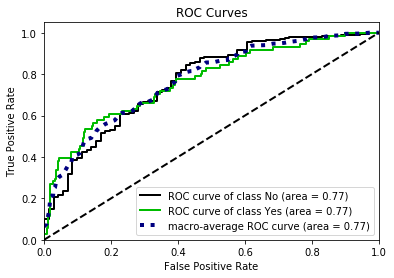

In [1830]:
import scikitplot as skplt

skplt.metrics.plot_roc(y_test, logistic_model.predict_proba(X_test), plot_micro = False)
plt.show()

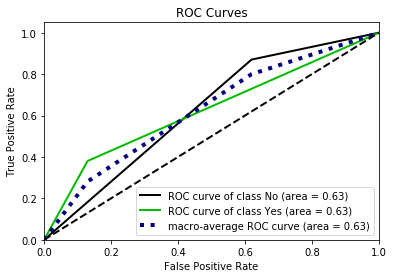

In [1831]:
import scikitplot as skplt

skplt.metrics.plot_roc(y_test, dt_classifier.predict_proba(X_test), plot_micro = False)
plt.show()

## Feature Selection with Random Forest

In [1832]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=1000, max_depth=None, 
                               min_samples_split=10, class_weight="balanced")
rf.fit(X_train_all, y_train_all)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

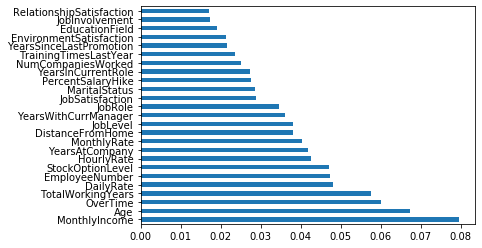

In [1833]:
# selected top 20 important features using RF
feat_importances = pd.Series(rf.feature_importances_, index = X.columns)
feat_importances = feat_importances.nlargest(25)
feat_importances.plot(kind ='barh')
plt.show()

In [2]:
average_precision_score(y_true, y_pred)

NameError: name 'y_true' is not defined